# データセットを使ったトピック化

多くの文書を使った実践を行っていきます。

ここでは、fetch_20newsgroupsという英語のニュース文書を実践します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

データセットを読み込む（ダウンロードに時間を要する)

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
newsgroups = fetch_20newsgroups(shuffle=True,
                                random_state=1,
                                remove=('headers', 'footers', 'quotes'))

In [5]:
type(newsgroups)

sklearn.utils.Bunch

In [6]:
dir(newsgroups)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [7]:
type(newsgroups.data)

list

In [8]:
len(newsgroups.data)

11314

In [9]:
newsgroups.data[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

このデータは、20種類に分類されているデータではある。

In [10]:
newsgroups.target.shape

(11314,)

In [11]:
np.unique(newsgroups.target).size

20

# Bag-of-Words

文書 x 単語の疎行列を作成するが、データ数が多いので、特徴量を1000に絞る

In [12]:
max_features = 1000
tf_vectorizer = CountVectorizer(max_features=max_features,
                                stop_words='english')

In [13]:
tf = tf_vectorizer.fit_transform(newsgroups.data)

In [14]:
tf.shape

(11314, 1000)

In [15]:
print(tf[0][0])

  (0, 872)	1
  (0, 860)	1
  (0, 303)	1
  (0, 854)	1
  (0, 589)	4
  (0, 714)	1
  (0, 496)	2
  (0, 985)	1
  (0, 443)	1
  (0, 534)	1
  (0, 914)	1
  (0, 897)	1
  (0, 745)	1
  (0, 760)	1
  (0, 229)	1
  (0, 762)	1
  (0, 748)	1
  (0, 423)	1
  (0, 573)	1
  (0, 146)	1
  (0, 554)	1
  (0, 501)	1
  (0, 421)	1
  (0, 703)	1


# LDAでトピックに分類

ここでは、20個のトピックにわける。

In [16]:
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics).fit(tf)

各トピックが持つ単語分布

In [17]:
lda.components_

array([[1.01256281e+00, 5.01770747e-02, 6.32891801e+01, ...,
        1.05017578e+00, 6.65133384e-01, 8.46825874e+00],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, ...,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [5.00000004e-02, 2.86115225e+01, 5.00000006e-02, ...,
        8.28974118e+00, 1.50773465e+01, 5.00000005e-02],
       ...,
       [5.00000002e-02, 5.00000004e-02, 5.00000008e-02, ...,
        4.24552181e+00, 5.00000002e-02, 5.00000001e-02],
       [5.00000003e-02, 1.45962017e+01, 5.00000010e-02, ...,
        1.66097292e+00, 9.54849651e+01, 2.57245671e+01],
       [3.55608582e+00, 5.00000004e-02, 5.00000014e-02, ...,
        5.00000008e-02, 5.00000008e-02, 5.00000006e-02]])

文書の特徴量をトピックで表す

In [18]:
transformed = lda.transform(tf)

In [19]:
transformed.shape

(11314, 20)

In [20]:
transformed[0]

array([0.00172414, 0.00172414, 0.00172414, 0.00172414, 0.00172414,
       0.00172414, 0.00172414, 0.50511871, 0.00172414, 0.00172414,
       0.00172414, 0.00172414, 0.00172414, 0.00172414, 0.00172414,
       0.00172414, 0.46384681, 0.00172414, 0.00172414, 0.00172414])

In [21]:
transformed[1]

array([0.00151515, 0.00151515, 0.00151515, 0.00151515, 0.00151515,
       0.00151515, 0.29017531, 0.00151515, 0.00151515, 0.16497583,
       0.00151515, 0.00151515, 0.00151515, 0.46453067, 0.00151515,
       0.00151515, 0.00151515, 0.00151515, 0.05607576, 0.00151515])

文書がどのトピックに所属しているかをグラフで表現

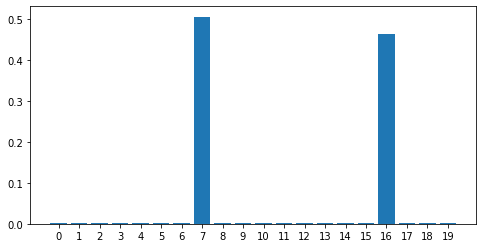

In [22]:
doc_id = 0

plt.figure(figsize=(8, 4))
topics = range(len(transformed[doc_id]))
plt.bar(topics, height=transformed[doc_id], width=0.8)
plt.xticks(topics)
plt.show()

一つの文書が20個のトピックに所属する確率がでているので、複数のトピックに所属するように出力される。

In [23]:
data_array = np.array(newsgroups.data)  # このあと使うために ndarray化

トピックに所属する文書を確認する

In [24]:
def topic_summary(transformed, topic_id):
    indexes = np.argsort(transformed[:, topic_id])[::-1][:10]
#     print(indexes)
    docs = data_array[indexes]
    for i, doc in enumerate(docs):
        text = doc[:200].replace('\n', ' ')
        print(f"{i}: {indexes[i]} : {text}")
        print("===")

In [25]:
topic_summary(transformed, 2)

0: 5780 :  In Texas, it is legal to carry handguns while "traveling", and also to and from sporting activities.           ^^^^^^^^  Chapter 46 of the Texas State Penal Code does NOT restrict long guns. Therefor
===
1: 3342 :  I don't have the wiretap statute handy.  But here's what the law says on pen registers.  This is all from Title 18 of the U.S. Code.  Note how vague S. 3125(a)(1)(B) is....  I haven't had a chance to
===
2: 7078 :    I get it.  One organization wants to abolish age of consent laws, whereas in contrast the other wants to abolish age of consent laws. This makes it respectable to belong to one organization, but no
===
3: 920 : [Note, Ohio legislation unlike Federal legislation, shows the entire law as it would be changed by the legislation.  These parts are in ALL CAPITALS, the rest (i.e., current law is in regular type)]. 
===
4: 6585 :  And not only that, but if the drugs were legal we could have pharmacists instead of pushers selling them, and the pharmacists coul

# 似ているものを見つける

K-means法でクラスタリングを行なってみます。

ここまででは、文書が20個トピックに所属する確率がでています。同じようなトピックに所属しているかをもう少しまとめてみます。

In [26]:
from sklearn.cluster import KMeans

適切なクラスタリング数をエルボー法で見てみます。

In [27]:
dist = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(transformed)
    dist.append(km.inertia_)
dist

[4228.4997073589975,
 3555.0105624863336,
 3069.212003543397,
 2689.341315984293,
 2335.0808567670447,
 2079.0186586887044,
 1914.2217295822256,
 1783.4774994949091,
 1699.3270450782843,
 1585.028733688243,
 1494.5303621614253,
 1419.0377575938196,
 1334.13756418299,
 1252.0970305988103,
 1201.4014252302954,
 1129.9366911340144,
 1101.9513337570586,
 1076.7796198932472,
 1026.545876024224]

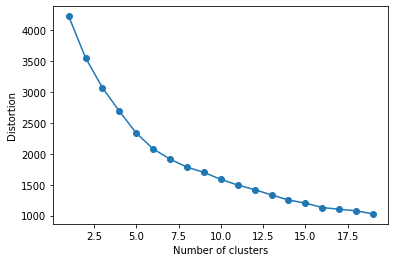

In [28]:
fig, ax = plt.subplots()
ax.plot(range(1, 20), dist, marker="o")
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Distortion')
plt.show()

ここでは、10個でクラスタリングを行なってみます。

In [29]:
n_clusters = 10
km = KMeans(n_clusters=n_clusters)

In [30]:
pred = km.fit_predict(transformed)

In [31]:
pred[0]

7

In [32]:
pred[4092]

3

In [33]:
pred[8281]

7

関数化し、同じクラスタの文書を出力

In [34]:
def similar_doc_ids(pred_, data, doc_id):
    similar_id = pred_[doc_id]
    indexes = np.where(pred_==similar_id)
#     print(f"Number of similar: {indexes[0].size}")
    return indexes[0]

文書数が多いので、ランダムに出力

In [35]:
np.random.choice(similar_doc_ids(pred, data_array, 0), 10)

array([ 4808,  2627,  5092, 10797,  3496,  8776, 10236,  1374, 10617,
        1092])

In [36]:
for data in data_array[np.random.choice(similar_doc_ids(pred, data_array, 0), 5)]:
    print(data[:300])
    print("=================")
    print()

I will again *repeat* my statement: 1) I *do not* condone these 
*indiscriminate* Israeli acts (nor have I *ever*, 2) If the villagers do not know who these "guerillas" are (which you stated earlier), how do you expect the
Israelis to know? It is **very** difficult to "identify" who they are (this
*


Contrary to what the "Protocols of Zion crowd" might suggest,
Judaism does not have any such goals.


The question you ask is complicated and deserves an honest answer.
I am going to provide one from my own current perspective, not a historical
one.  Currently, as a non-observant jew/Israeli/Americ


We have no way to know that the cultists burned the house; it could have been
the BATF and FBI.  We only have the government's word for it, after all, and
people who started it by a no-knock search with concussion grenades are hardly
disinterested observers.
--
"On the first day after Christmas my 

[ ... ]

Then it also supports basing such regulations on ignorance.

Miller had disappeared, 